# Diabetes Dataset for Beginners
## Diabetic patient dataset from kaggle

### About Dataset
#### Context
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage

#### Content
The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

#### Acknowledgements
Smith, J.W., Everhart, J.E., Dickson, W.C., Knowler, W.C., & Johannes, R.S. (1988). Using the ADAP learning algorithm to forecast the onset of diabetes mellitus. In Proceedings of the Symposium on Computer Applications and Medical Care (pp. 261--265). IEEE Computer Society Press.

#### Inspiration
Can you build a model (Machine learning or deep learning ) to accurately predict whether or not the patients in the dataset have diabetes or not?

#### The data contains the following columns:
1. Pregnancies
2. Glucose
3. BloodPressure
4. SkinThickness
5. Insulin
6. BMI
7. DiabetesPedigreeFunction
8. Age
9. Outcome

## Lets begin the hard work

#### Import Libraries

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [57]:
diabetes = pd.read_excel('diabetes.xlsx')

In [45]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
diabetes.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [4]:
diabetes.shape

(768, 9)

In [5]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### DATA CLEANING
I noticed some zeros so i need to research on that and clean accordingly. It is not possible for Glucose, BloodPressure, SkinThickness, Insulin and	BMI to have '0' as its value. I would convert the '0' values to NAN and explore using the python missingno library.

In [58]:
missing_values= diabetes.loc[:,'Glucose':'BMI']
missing_values.replace(0, np.nan, inplace=True)
diabetes.loc[:,'Glucose':'BMI'] = missing_values

In [59]:
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,NaN,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,NaN,NaN,30.1,0.349,47,1


In [60]:
diabetes.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

Using missingno datascience library

In [77]:
!pip install missingno


In [70]:
import missingno as msno

##### Missingno Bar chart
From the missingno bar chart below, it is evident that Insulin and Skin Thickness have the highest amount of missing values.

<AxesSubplot:>

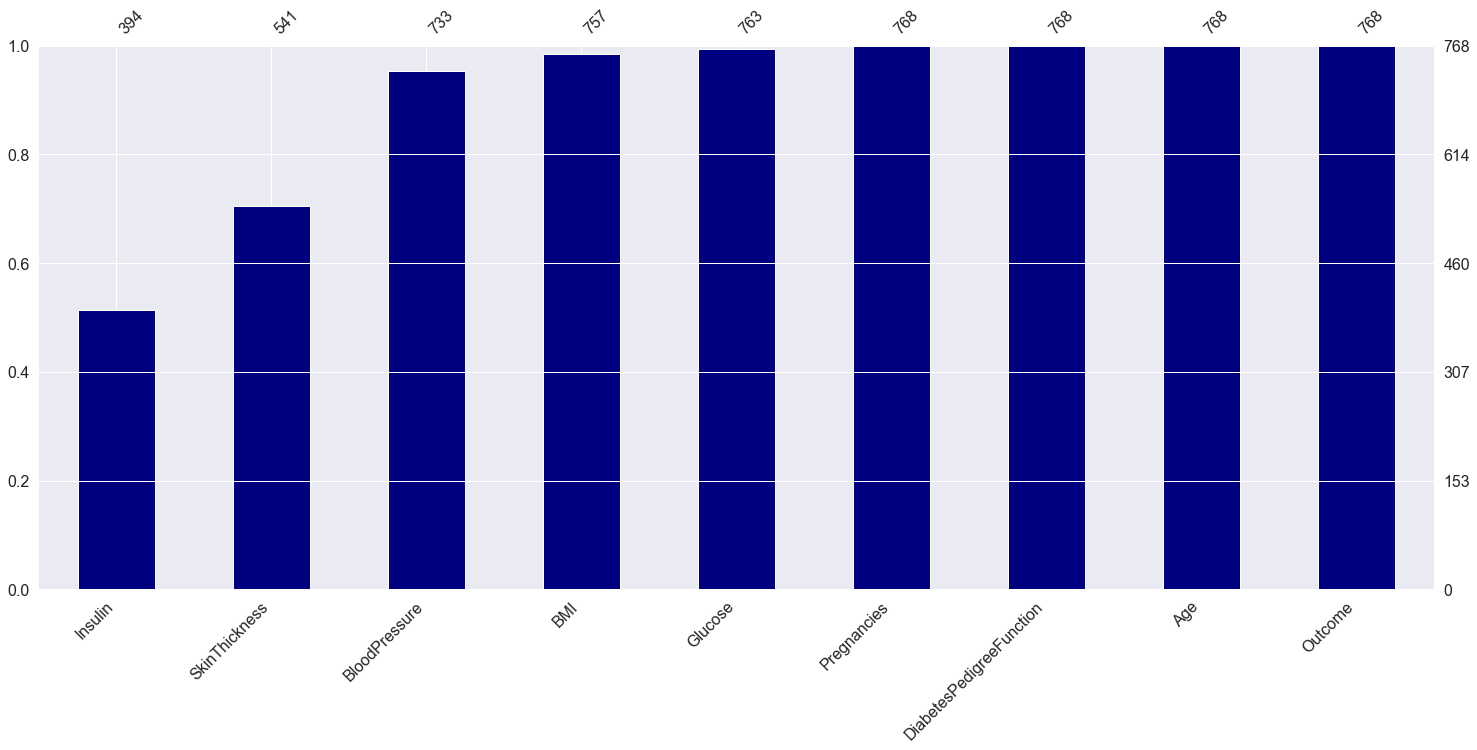

In [75]:
msno.bar(diabetes, sort="ascending", color='navy')

##### Missingno Matrix
From the missingno matrix chart below, We can see that Insulin and SlinThickness has almost the same distribution of missing values. Glucose, BloodPressure and NMI have fewer missing values.

<AxesSubplot:>

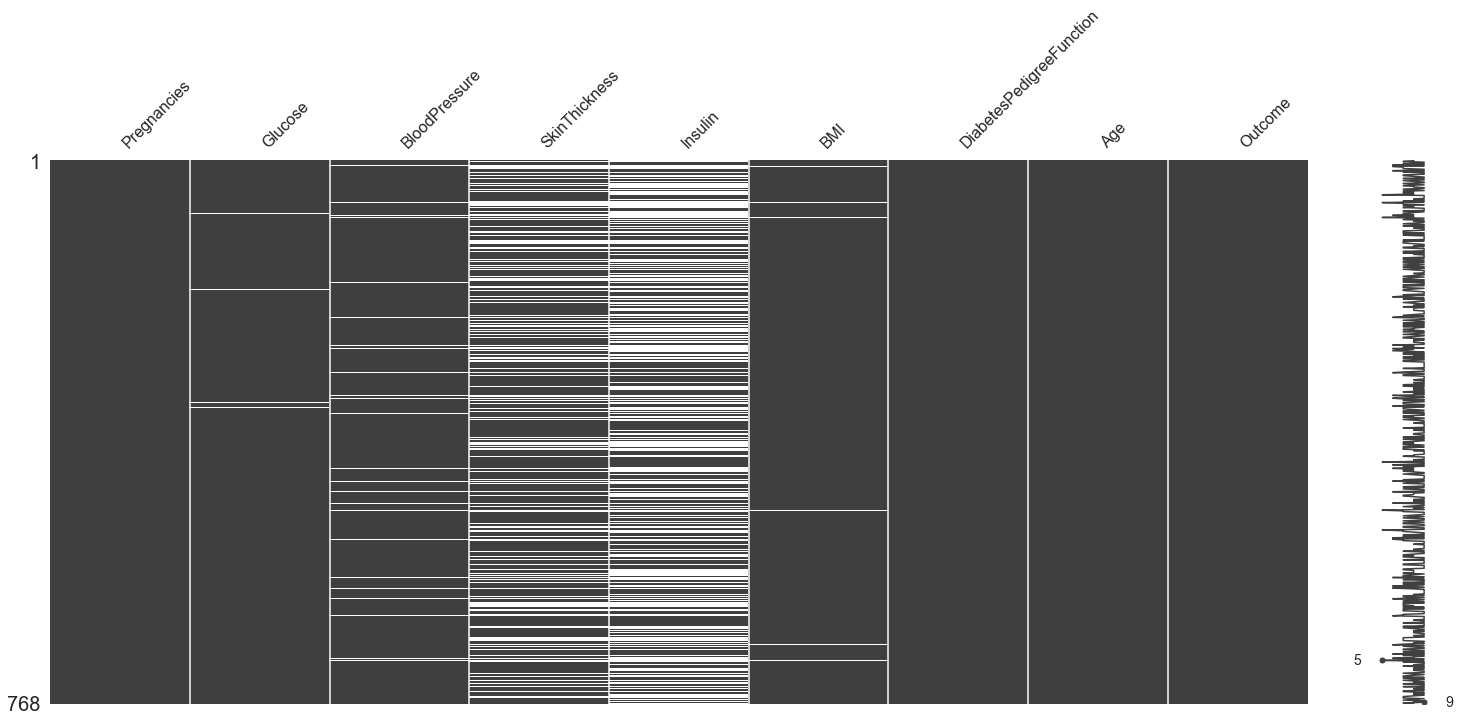

In [79]:
msno.matrix(diabetes)

##### Missingno Heatmap
The nullity correlation ranges from -1 to 1.

1. 1 - Exact Negative correlation represents that if the value of one variable is present then the value of other variables is definitely absent.
2. 0 - No correlation represents that variables values present or absent do not have any effect on one another.
3. 1 - Exact Positive correlation represents that if the value of one variable is present then the value of the other is definitely present.

We can see from the heatmap nelow that Insulin and SkinThickness have a correlation of 0.7 which is close to 1, and so if an Insulin value is missing then there is a very high chance for SkinThickness value to be missing as well.

<AxesSubplot:>

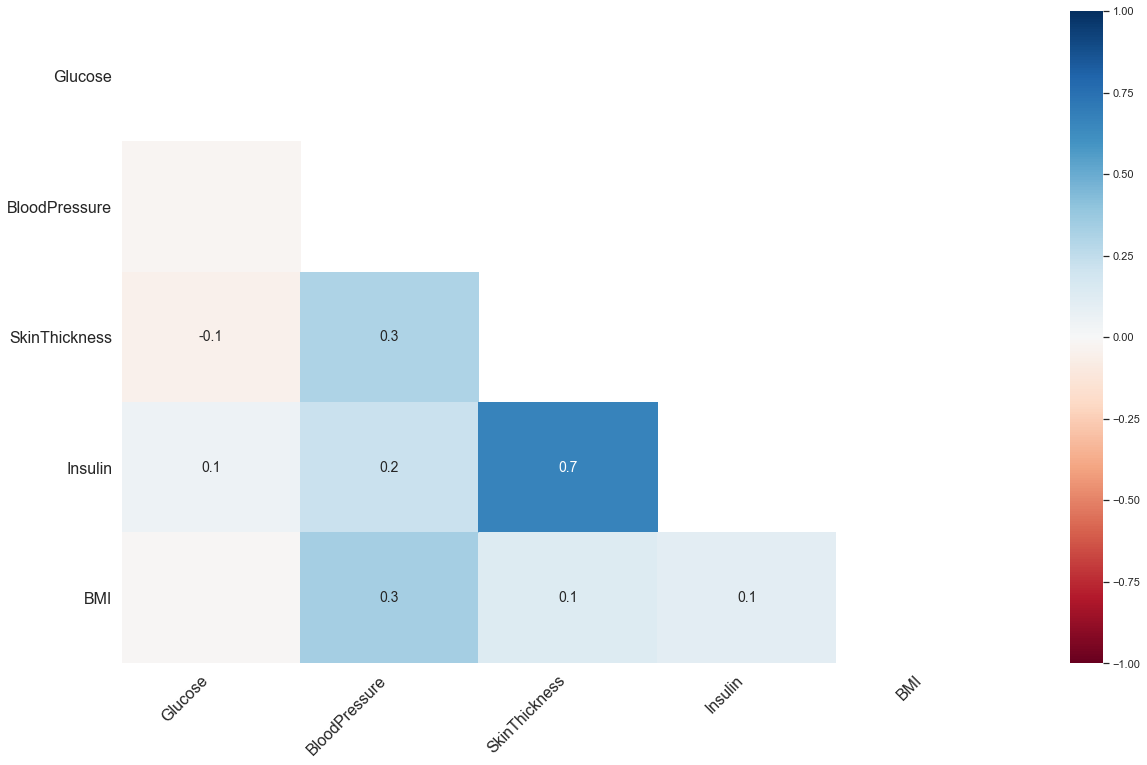

In [74]:
msno.heatmap(diabetes)

### Feature Engineering
Adding a column for the different BMI ranges

In [7]:
#define bins 
bins = [0, 18.5, 24.9, 29.9, 67.1]

#name of groups
groups = ['Underweight', 'NormalWeight', 'OverWeight', 'Obese']


diabetes['BMI_Categories'] = pd.cut(diabetes['BMI'], bins=bins, labels=groups)


#diabetes.insert(6, "BMI_CATEGORIES2", A)
#diabetes = diabetes.drop(columns="BMI_CATEGORIES2")

In [8]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMI_Categories
0,6,148,72,35,0,33.6,0.627,50,1,Obese
1,1,85,66,29,0,26.6,0.351,31,0,OverWeight
2,8,183,64,0,0,23.3,0.672,32,1,NormalWeight
3,1,89,66,23,94,28.1,0.167,21,0,OverWeight
4,0,137,40,35,168,43.1,2.288,33,1,Obese


In [9]:
diabetes['BMI_Categories']

0             Obese
1        OverWeight
2      NormalWeight
3        OverWeight
4             Obese
           ...     
763           Obese
764           Obese
765      OverWeight
766           Obese
767           Obese
Name: BMI_Categories, Length: 768, dtype: category
Categories (4, object): ['Underweight' < 'NormalWeight' < 'OverWeight' < 'Obese']

### Exploratory Data Analysis (EDA)

<AxesSubplot:xlabel='Outcome', ylabel='count'>

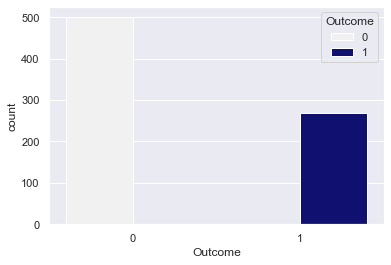

In [11]:
sns.countplot(x = 'Outcome', data = diabetes, color="navy", alpha= 1, hue='Outcome')

[Text(0.5, 1.0, 'Age Distribution')]

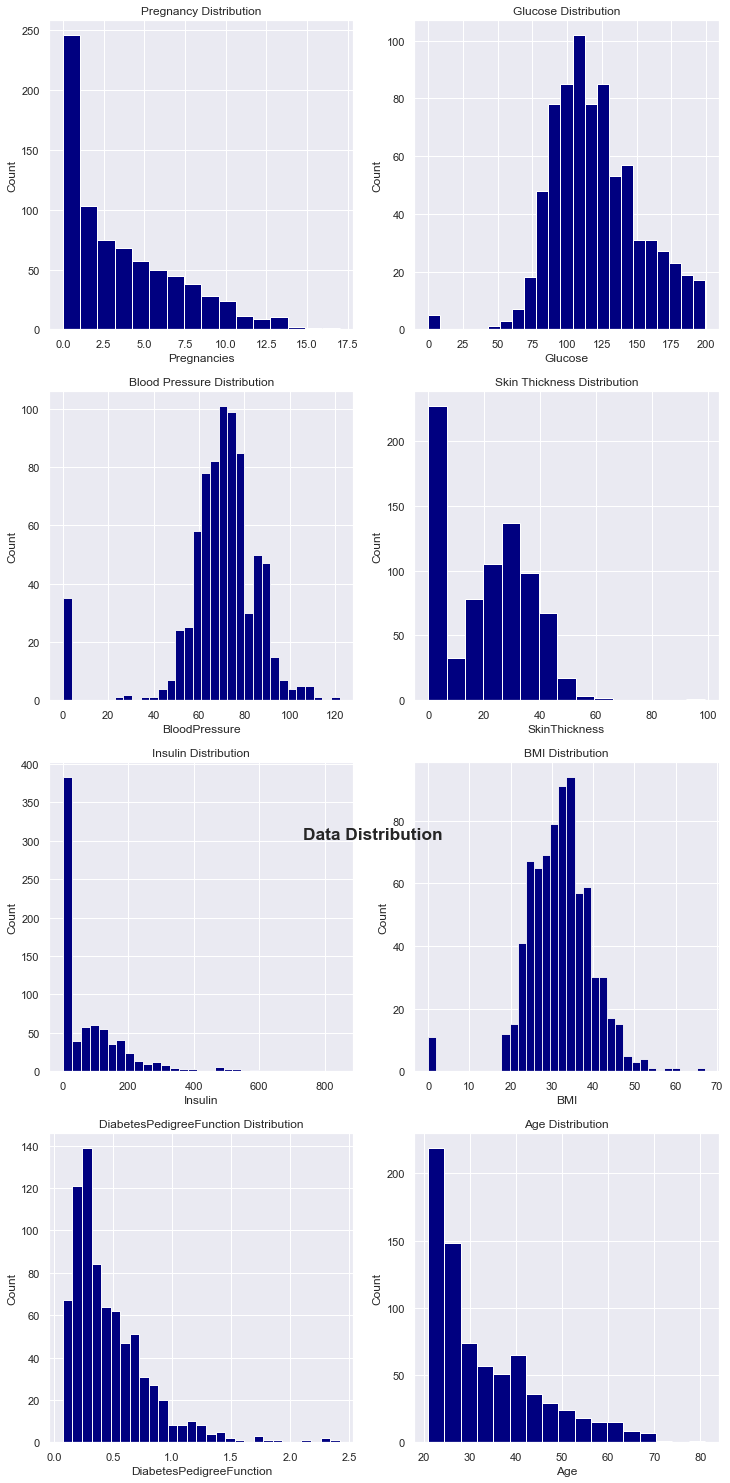

In [12]:
#define plotting region (4 rows, 2 columns)
fig, axes = plt.subplots(4, 2, figsize=(12,10))

  
    
# Adjust subplots so that titles don't overlap
fig.subplots_adjust( top = 2.1 )
  
    # Title for the complete figure
fig.suptitle("Data Distribution" , fontsize = 'x-large' , fontweight = 'bold' )

#The alpha parameter controls the opacity of the bars. The value can be set to any value from 0 to 1.

#Pregnancy distribution
sns.histplot( diabetes['Pregnancies'] , color="navy", alpha= 1, ax=axes[0,0]).set(title='Pregnancy Distribution')
#Glucose distribution
sns.histplot( diabetes['Glucose'] , color="navy", alpha= 1, ax=axes[0,1]).set(title='Glucose Distribution')
#BloodPressure distribution
sns.histplot( diabetes['BloodPressure'] , color="navy", alpha= 1, ax=axes[1,0]).set(title='Blood Pressure Distribution')
#SkinThickness distribution
sns.histplot( diabetes['SkinThickness'] , color="navy", alpha= 1, ax=axes[1,1]).set(title='Skin Thickness Distribution')
#Insulin distribution
sns.histplot( diabetes['Insulin'] , color="navy", alpha= 1, ax=axes[2,0]).set(title='Insulin Distribution')
#BMI distribution
sns.histplot( diabetes['BMI'] , color="navy", alpha= 1, ax=axes[2,1]).set(title='BMI Distribution')
#DiabetesPedigreeFunction
sns.histplot( diabetes['DiabetesPedigreeFunction'] , color="navy", alpha= 1, ax=axes[3,0]).set(title='DiabetesPedigreeFunction Distribution')
#Age distribution
sns.histplot( diabetes['Age'] , color="navy", alpha= 1, ax=axes[3,1]).set(title='Age Distribution')

### MORE Exploratory Data Analysis

<AxesSubplot:xlabel='Pregnancies', ylabel='count'>

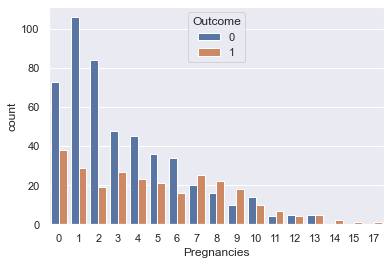

In [13]:
sns.countplot(x='Pregnancies', hue='Outcome', data=diabetes)

<AxesSubplot:xlabel='Glucose', ylabel='Count'>

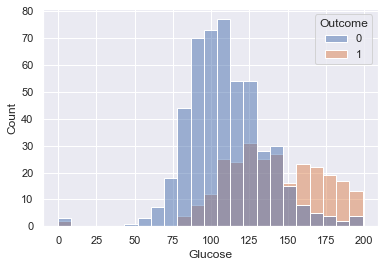

In [14]:
sns.histplot(x='Glucose', hue='Outcome', data=diabetes)

<AxesSubplot:xlabel='BloodPressure', ylabel='Count'>

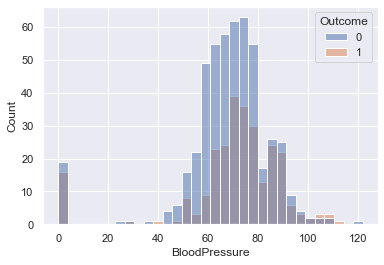

In [15]:
sns.histplot(x='BloodPressure', hue='Outcome', data=diabetes)

<AxesSubplot:xlabel='SkinThickness', ylabel='Count'>

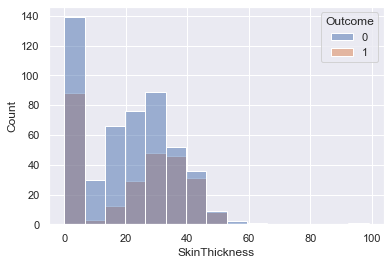

In [16]:
sns.histplot(x='SkinThickness', hue='Outcome', data=diabetes)

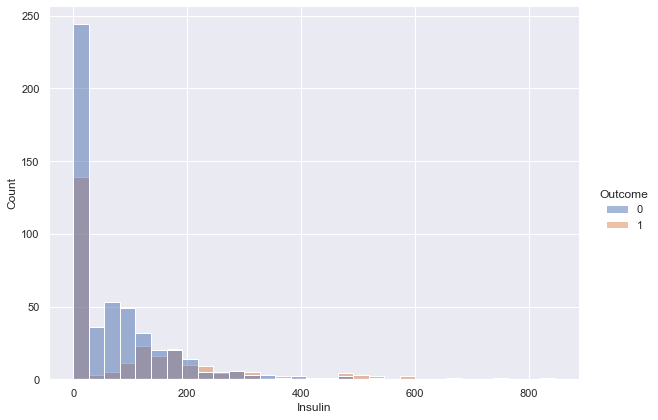

In [17]:
sns.displot(x='Insulin', hue='Outcome', data=diabetes, height=6, aspect=1.4)